#Neural Network HW1 Part2
##Group 2
Saeed Samimi,
marjan Mohammadi,
Mohammd Ali Ahrabi

##Basic

In [ ]:
#importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

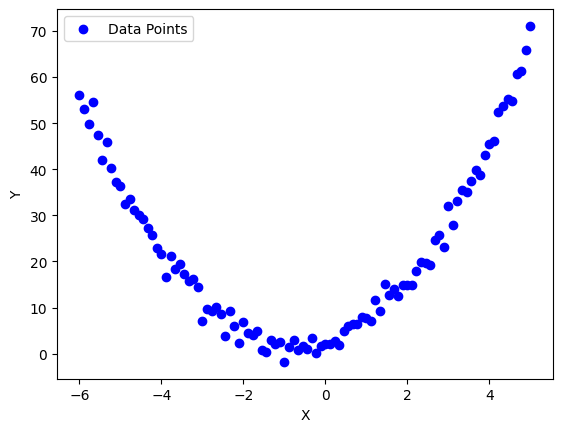

In [ ]:
#Creating Data

a = 2.0
b = 3.0
c = 4.0

n = 100

x = np.linspace(-6, 5, n)
noise = np.random.normal(-2, 2, n)
y = a * x**2 + b * x + c + noise

plt.scatter(x, y, label='Data Points', color='blue')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

In [ ]:
#exporting data to use for all functions

data = data = list(zip(x, y))
data = pd.DataFrame(data)
data.to_csv('/content/drive/MyDrive/NN_HW1(data2).csv', index=False)

In [ ]:
#importing data from google drive

data = pd.read_csv('/content/drive/MyDrive/NN_HW1(data2).csv')
x = data.iloc[:,0]
y = data.iloc[:,1]

##Stochastic Gradient Descent

Trained weight: [1.98233015] [2.85976523] [1.94187534]
SGD MSE: 4.793721023158977


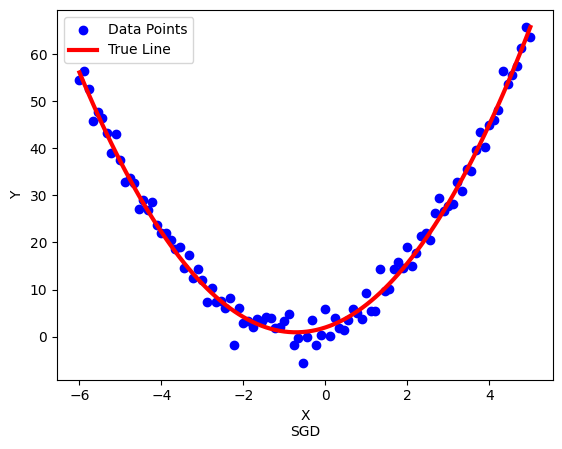

In [ ]:
#Stohastic Gradient Descent

a = np.random.rand(1)
b = np.random.rand(1)
c = np.random.rand(1)

learning_rate = 0.0001
epochs = 100000

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = a * x_i**2 + b * x_i + c
    error = (y_i - y_pred)

    da =  error * -1 * x_i**2
    db =  error * -1 * x_i
    dc =  error * -1 * 1

    a = a - learning_rate * da
    b = b - learning_rate * db
    c = c - learning_rate * dc

mse = np.mean((y - (a * x**2 + b * x + c))**2)
print("Trained weight:", a,b,c)
print("SGD MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = a * x**2 + b * x + c
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nSGD')
plt.ylabel('Y')

plt.legend()
plt.show()

##Momentum

Trained weight: [2.00624445] [2.8868453] [1.98110521]
Momentum MSE: 4.840015932522641


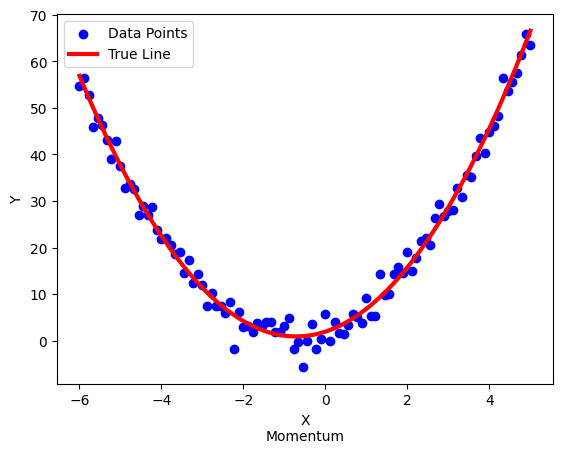

In [ ]:
a = np.random.rand(1)
b = np.random.rand(1)
c = np.random.rand(1)

learning_rate = 0.0001
epochs = 200000
v_a = 0
v_b = 0
v_c = 0
beta = 0.9

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = a * x_i**2 + b * x_i + c
    error = (y_i - y_pred)

    da =  error * -1 * x_i**2
    db =  error * -1 * x_i
    dc =  error * -1 * 1

    a = a - learning_rate * v_a
    b = b - learning_rate * v_b
    c = c - learning_rate * v_c

    v_a = beta * v_a + (1- beta) * da
    v_b = beta * v_b + (1- beta) * db
    v_c = beta * v_c + (1- beta) * dc

mse = np.mean((y - (a * x**2 + b * x + c))**2)
print("Trained weight:", a,b,c)
print("Momentum MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = a * x**2 + b * x + c
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nMomentum')
plt.ylabel('Y')

plt.legend()
plt.show()

##Nesterov Accelerated Gradient (NAG)

Trained weight: [1.98947416] [2.8666896] [1.73341015]
NAG MSE: 4.836991791904568


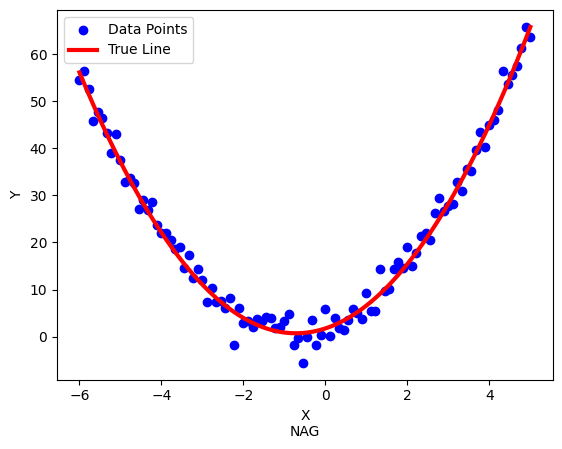

In [ ]:
a = np.random.rand(1)
b = np.random.rand(1)
c = np.random.rand(1)

learning_rate = 0.001
epochs = 200000
v_a = 0
v_b = 0
v_c = 0
beta = 0.9

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    a_star = a - learning_rate * v_a
    b_star = b - learning_rate * v_b
    c_star = c - learning_rate * v_c

    y_pred = a_star * x_i**2 + b_star * x_i + c_star
    error = (y_i - y_pred)

    da =  error * -1 * x_i**2
    db =  error * -1 * x_i
    dc =  error * -1 * 1

    v_a = beta * v_a + learning_rate * da
    v_b = beta * v_b + learning_rate * db
    v_c = beta * v_c + learning_rate * dc

    a -= learning_rate * v_a
    b -= learning_rate * v_b
    c -= learning_rate * v_c

mse = np.mean((y - (a * x**2 + b * x + c))**2)
print("Trained weight:", a,b,c)
print("NAG MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = a * x**2 + b * x + c
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nNAG')
plt.ylabel('Y')

plt.legend()
plt.show()

##AdaGrad

Trained weight: [1.99074247] [2.86001214] [1.94362018]
adaGrad MSE: 4.781259336841541


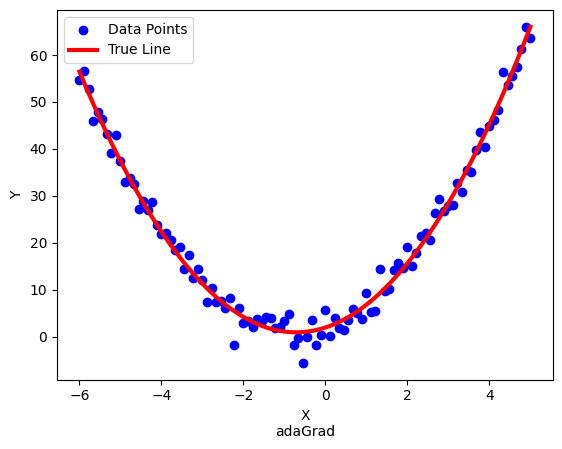

In [ ]:
a = np.random.rand(1)
b = np.random.rand(1)
c = np.random.rand(1)

learning_rate = 0.01
epochs = 400000
epsilon = 1e-7
S_a = 0
S_b = 0
S_c = 0

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = a * x_i**2 + b * x_i + c
    error = (y_i - y_pred)

    da =  error * -1 * x_i**2
    db =  error * -1 * x_i
    dc =  error * -1 * 1

    S_a += da**2
    S_b += db**2
    S_c += dc**2

    a -= (learning_rate / (np.sqrt(S_a) + epsilon)) * da
    b -= (learning_rate / (np.sqrt(S_b) + epsilon)) * db
    c -= (learning_rate / (np.sqrt(S_c) + epsilon)) * dc

mse = np.mean((y - (a * x**2 + b * x + c))**2)
print("Trained weight:", a,b,c)
print("adaGrad MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = a * x**2 + b * x + c
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nadaGrad')
plt.ylabel('Y')

plt.legend()
plt.show()

##RMSprop

<ipython-input-53-8bcf63c1bbc2>:27: RuntimeWarning: overflow encountered in add
  S_a += beta * S_a + (1 - beta) * (da**2)
<ipython-input-53-8bcf63c1bbc2>:28: RuntimeWarning: overflow encountered in add
  S_b += beta * S_b + (1 - beta) * (db**2)
<ipython-input-53-8bcf63c1bbc2>:29: RuntimeWarning: overflow encountered in add
  S_c += beta * S_c + (1 - beta) * (dc**2)


Trained weight: [1.07846821] [0.85677371] [0.17102501]
RMSprop MSE: 195.1825690938663


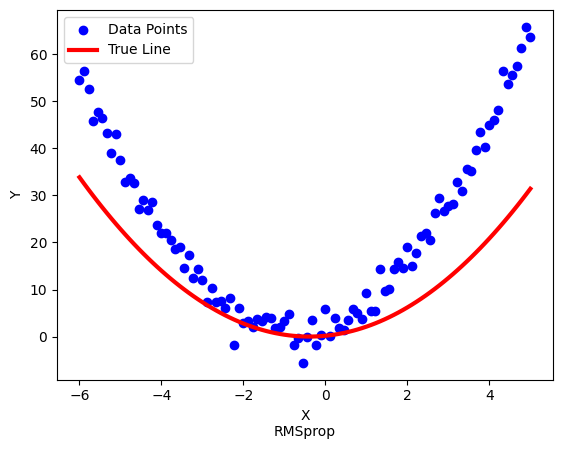

In [ ]:
a = np.random.rand(1)
b = np.random.rand(1)
c = np.random.rand(1)

learning_rate = 0.01
epochs = 100000
epsilon = 1e-7
beta = 0.9
S_a = 0
S_b = 0
S_c = 0

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = a * x_i**2 + b * x_i + c
    error = (y_i - y_pred)

    da =  error * -1 * x_i**2
    db =  error * -1 * x_i
    dc =  error * -1 * 1

    S_a += beta * S_a + (1 - beta) * (da**2)
    S_b += beta * S_b + (1 - beta) * (db**2)
    S_c += beta * S_c + (1 - beta) * (dc**2)

    a -= (learning_rate / (np.sqrt(S_a + epsilon))) * da
    b -= (learning_rate / (np.sqrt(S_b + epsilon))) * db
    c -= (learning_rate / (np.sqrt(S_c + epsilon))) * dc

mse = np.mean((y - (a * x**2 + b * x + c))**2)
print("Trained weight:", a,b,c)
print("RMSprop MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = a * x**2 + b * x + c
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nRMSprop')
plt.ylabel('Y')

plt.legend()
plt.show()

##Adadelta

Trained weight: [1.98080596] [2.83995697] [2.01704722]
adadelta MSE: 4.788068359204449


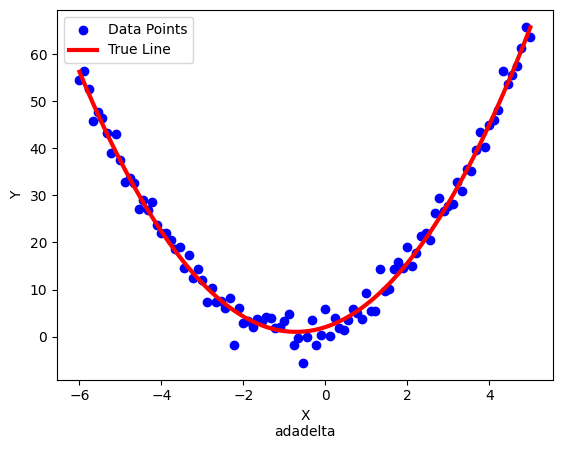

In [ ]:
a = np.random.rand(1)
b = np.random.rand(1)
c = np.random.rand(1)

learning_rate = 0.01
epochs = 100000
epsilon = 1e-6
beta = 0.9
S_da = 0
S_db = 0
S_dc = 0
D_a = 0
D_b = 0
D_c = 0
a_t = 0
b_t = 0
c_t = 0
D_a_t = 0
D_b_t = 0
D_c_t = 0

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = a * x_i**2 + b * x_i + c
    error = (y_i - y_pred)

    da =  error * -1 * x_i**2
    db =  error * -1 * x_i
    dc =  error * -1 * 1

    S_da = beta * S_da + (1 - beta) * (da**2)
    S_db = beta * S_db + (1 - beta) * (db**2)
    S_dc = beta * S_dc + (1 - beta) * (dc**2)

    delta_a = a - a_t
    delta_b = b - b_t
    delta_c = c - c_t

    D_a = beta * D_a_t + (1-beta) * (delta_a**2)
    D_b = beta * D_b_t + (1-beta) * (delta_b**2)
    D_c = beta * D_c_t + (1-beta) * (delta_c**2)

    D_a_t = D_a
    D_b_t = D_b
    D_c_t = D_c

    a -= np.sqrt(D_a + epsilon) / np.sqrt(S_da + epsilon) * da
    b -= np.sqrt(D_b + epsilon) / np.sqrt(S_db + epsilon) * db
    c -= np.sqrt(D_c + epsilon) / np.sqrt(S_dc + epsilon) * dc

    a_t = a
    b_t = b
    c_t = c

mse = np.mean((y - (a * x**2 + b * x + c))**2)
print("Trained weight:", a,b,c)
print("adadelta MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = a * x**2 + b * x + c
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nadadelta')
plt.ylabel('Y')

plt.legend()
plt.show()

##Adam


Trained weight: [1.96873488] [2.85419559] [2.31239025]
adam MSE: 4.831097288263681


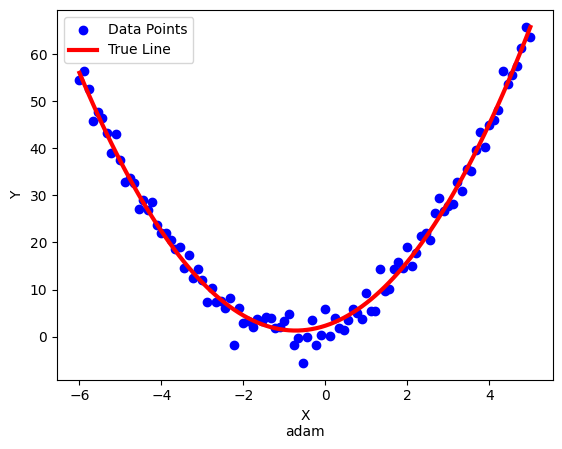

In [ ]:
a = np.random.rand(1)
b = np.random.rand(1)
c = np.random.rand(1)

learning_rate = 0.001
epochs = 100000
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.999
v_a = 0
v_b = 0
v_c = 0
S_a = 1e-8
S_b = 1e-8
S_c = 1e-8
t = 0

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = a * x_i**2 + b * x_i + c
    error = (y_i - y_pred)

    da =  error * -1 * x_i**2
    db =  error * -1 * x_i
    dc =  error * -1 * 1

    t += 1

    v_a = beta1 * v_a + (1 - beta1) * da
    v_b = beta1 * v_b + (1 - beta1) * db
    v_c = beta1 * v_c + (1 - beta1) * dc

    S_a = beta2 * S_a + (1 - beta2) * (da**2)
    S_b = beta2 * S_b + (1 - beta2) * (db**2)
    S_c = beta2 * S_c + (1 - beta2) * (dc**2)

    v_a_hat = v_a / (1 - beta1**t)
    v_b_hat = v_b / (1 - beta1**t)
    v_c_hat = v_c / (1 - beta1**t)

    S_a_hat = S_a / (1 - beta2**t)
    S_b_hat = S_b / (1 - beta2**t)
    S_c_hat = S_c / (1 - beta2**t)

    a -= (learning_rate / (np.sqrt(S_a_hat) + epsilon)) * v_a_hat
    b -= (learning_rate / (np.sqrt(S_b_hat) + epsilon)) * v_b_hat
    c -= (learning_rate / (np.sqrt(S_c_hat) + epsilon)) * v_c_hat

mse = np.mean((y - (a * x**2 + b * x + c))**2)
print("Trained weight:", a,b,c)
print("adam MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = a * x**2 + b * x + c
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nadam')
plt.ylabel('Y')

plt.legend()
plt.show()

##AdaMax

Trained weight: [1.98738948] [2.8564824] [1.93314744]
adam MSE: 4.783626214957702


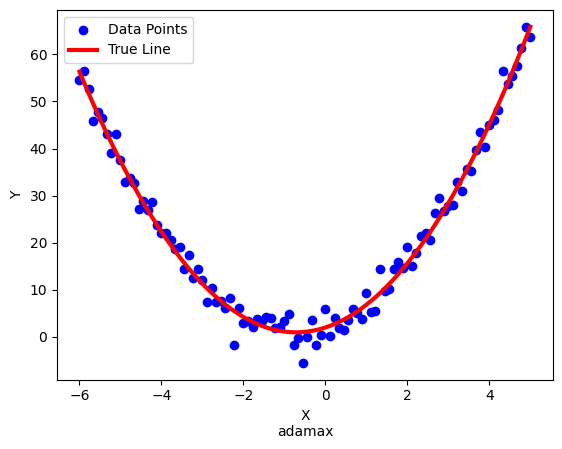

In [ ]:
a = np.random.rand(1)
b = np.random.rand(1)
c = np.random.rand(1)

learning_rate = 0.001
epochs = 400000
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.999
v_a = 0
v_b = 0
v_c = 0
S_a = 1e-8
S_b = 1e-8
S_c = 1e-8
t = 0

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = a * x_i**2 + b * x_i + c
    error = (y_i - y_pred)

    da =  error * -1 * x_i**2
    db =  error * -1 * x_i
    dc =  error * -1 * 1

    t += 1

    v_a = beta1 * v_a + (1 - beta1) * da
    v_b = beta1 * v_b + (1 - beta1) * db
    v_c = beta1 * v_c + (1 - beta1) * dc

    S_a = max(beta2 * S_a, np.abs(da))
    S_b = max(beta2 * S_b, np.abs(db))
    S_c = max(beta2 * S_c, np.abs(dc))

    v_a_hat = v_a / (1 - beta1**t)
    v_b_hat = v_b / (1 - beta1**t)
    v_c_hat = v_c / (1 - beta1**t)

    a -= (learning_rate / (S_a)) * v_a_hat
    b -= (learning_rate / (S_b)) * v_b_hat
    c -= (learning_rate / (S_c)) * v_c_hat

mse = np.mean((y - (a * x**2 + b * x + c))**2)
print("Trained weight:", a,b,c)
print("adam MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = a * x**2 + b * x + c
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nadamax')
plt.ylabel('Y')

plt.legend()
plt.show()

##Nadam

Trained weight: [1.98098155] [2.86191844] [2.00862254]
nadam MSE: 4.787995286498724


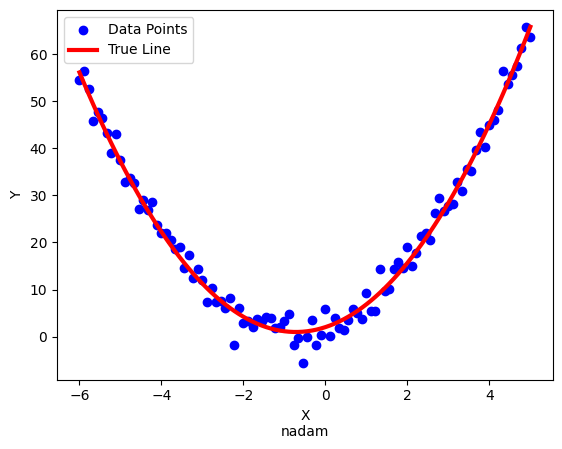

In [ ]:
a = np.random.rand(1)
b = np.random.rand(1)
c = np.random.rand(1)

learning_rate = 0.001
epochs = 400000
epsilon = 1e-7
beta1 = 0.9
beta2 = 0.999
v_a = 0
v_b = 0
v_c = 0
S_a = 1e-8
S_b = 1e-8
S_c = 1e-8
t = 0

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = a * x_i**2 + b * x_i + c
    error = (y_i - y_pred)

    da =  error * -1 * x_i**2
    db =  error * -1 * x_i
    dc =  error * -1 * 1

    t += 1

    v_a = beta1 * v_a + (1 - beta1) * da
    v_b = beta1 * v_b + (1 - beta1) * db
    v_c = beta1 * v_c + (1 - beta1) * dc

    S_a = beta2 * S_a + (1 - beta2) * (da**2)
    S_b = beta2 * S_b + (1 - beta2) * (db**2)
    S_c = beta2 * S_c + (1 - beta2) * (dc**2)

    v_a_hat = v_a / (1 - beta1**t)
    v_b_hat = v_b / (1 - beta1**t)
    v_c_hat = v_c / (1 - beta1**t)

    S_a_hat = S_a / (1 - beta2**t)
    S_b_hat = S_b / (1 - beta2**t)
    S_c_hat = S_c / (1 - beta2**t)

    a -= (learning_rate / (np.sqrt(S_a_hat) + epsilon)) * (beta1 * v_a_hat + ((1 - beta1)/(1 - beta1**t)) * da)
    b -= (learning_rate / (np.sqrt(S_b_hat) + epsilon)) * (beta1 * v_b_hat + ((1 - beta1)/(1 - beta1**t)) * db)
    c -= (learning_rate / (np.sqrt(S_c_hat) + epsilon)) * (beta1 * v_c_hat + ((1 - beta1)/(1 - beta1**t)) * dc)

mse = np.mean((y - (a * x**2 + b * x + c))**2)
print("Trained weight:", a,b,c)
print("nadam MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = a * x**2 + b * x + c
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nnadam')
plt.ylabel('Y')

plt.legend()
plt.show()

##AMSGrad

Trained weight: [1.99015704] [2.85642198] [1.99253793]
AMSGrad MSE: 4.782438404096855


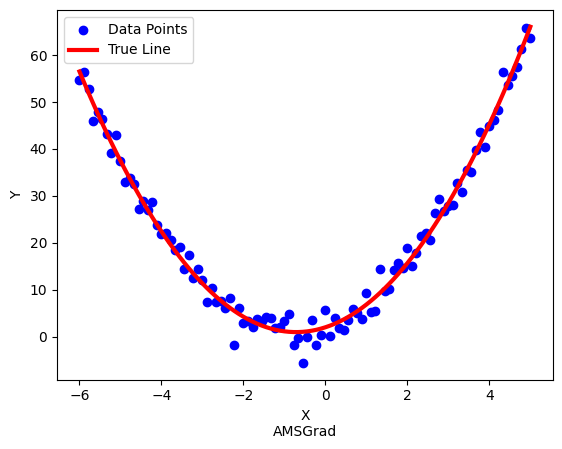

In [ ]:
a = np.random.rand(1)
b = np.random.rand(1)
c = np.random.rand(1)

learning_rate = 0.001
epochs = 400000
epsilon = 1e-7
beta1 = 0.9
beta2 = 0.999
v_a = 0
v_b = 0
v_c = 0
S_a = 1e-8
S_b = 1e-8
S_c = 1e-8
S_a_hat = 0
S_b_hat = 0
S_c_hat = 0
t = 0

for epoch in range(epochs):

    random_index = np.random.randint(len(x))

    x_i = x[random_index]
    y_i = y[random_index]

    y_pred = a * x_i**2 + b * x_i + c
    error = (y_i - y_pred)

    da =  error * -1 * x_i**2
    db =  error * -1 * x_i
    dc =  error * -1 * 1

    t += 1

    v_a = beta1 * v_a + (1 - beta1) * da
    v_b = beta1 * v_b + (1 - beta1) * db
    v_c = beta1 * v_c + (1 - beta1) * dc

    S_a = beta2 * S_a + (1 - beta2) * (da**2)
    S_b = beta2 * S_b + (1 - beta2) * (db**2)
    S_c = beta2 * S_c + (1 - beta2) * (dc**2)

    S_a_hat  = max(S_a_hat, S_a)
    S_b_hat  = max(S_b_hat, S_b)
    S_c_hat  = max(S_c_hat, S_c)

    a -= (learning_rate / (np.sqrt(S_a_hat) + epsilon)) * v_a
    b -= (learning_rate / (np.sqrt(S_b_hat) + epsilon)) * v_b
    c -= (learning_rate / (np.sqrt(S_c_hat) + epsilon)) * v_c

mse = np.mean((y - (a * x**2 + b * x + c))**2)
print("Trained weight:", a,b,c)
print("AMSGrad MSE:", mse)

plt.scatter(x, y, label='Data Points', color='blue')

true_line = a * x**2 + b * x + c
plt.plot(x, true_line, label='True Line', color='red', linestyle='-', linewidth=3)

plt.xlabel('X\nAMSGrad')
plt.ylabel('Y')

plt.legend()
plt.show()